# What I will cover in this notebook
1. Data Preprocessing
2. Data Visualization
3. Data Preprocessing for ml model
4. Predict rating of newly opened restaurants.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
a,b=df.shape
print('Data Point= ',a*b)
df.shape

Data Point=  879189


(51717, 17)

In [11]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51


# Data Preprocessing
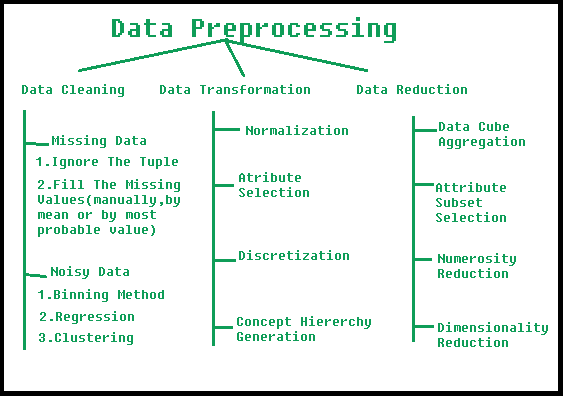

In [6]:
# Dropping Url and Phone no as they are useless for this project

df.drop(['url','phone','dish_liked'], axis =1, inplace=True) 

In [7]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
# Dropping duplicates.

print('Number of Dublicate values in Data Frame = ',df.duplicated().sum())
df.drop_duplicates(inplace=True)

Number of Dublicate values in Data Frame =  43


In [9]:
# Remove the NaN values from the dataset
df.dropna(how='any',inplace=True)

In [10]:
# clean Rating column
#Removing '/5' from Rates

df['rate'].unique()
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [11]:
# Cleaning individual columns.


# Cost for 2 people is in object data type we need to convert it to int
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',','.'))
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41237 entries, 0 to 41236
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      41237 non-null  object 
 1   name                         41237 non-null  object 
 2   online_order                 41237 non-null  object 
 3   book_table                   41237 non-null  object 
 4   rate                         41237 non-null  float64
 5   votes                        41237 non-null  int64  
 6   location                     41237 non-null  object 
 7   rest_type                    41237 non-null  object 
 8   cuisines                     41237 non-null  object 
 9   approx_cost(for two people)  41237 non-null  float64
 10  reviews_list                 41237 non-null  object 
 11  menu_item                    41237 non-null  object 
 12  listed_in(type)              41237 non-null  object 
 13  listed_in(city) 

In [12]:
# Checking no of resturants listed on Zomato
# There are 8792 resturants listed on Zomato in Bangalore city


# k = df.name.unique()
# len(k)

df.name.value_counts()

Cafe Coffee Day                   86
Onesta                            85
Empire Restaurant                 69
Kanti Sweets                      68
Five Star Chicken                 68
                                  ..
Daafoodies                         1
I Siri Restaurant And Caterers     1
The Foodware Veg                   1
Hotel Thalassery                   1
SeeYa Restaurant                   1
Name: name, Length: 6602, dtype: int64

<a id=2>
    
# Visualization

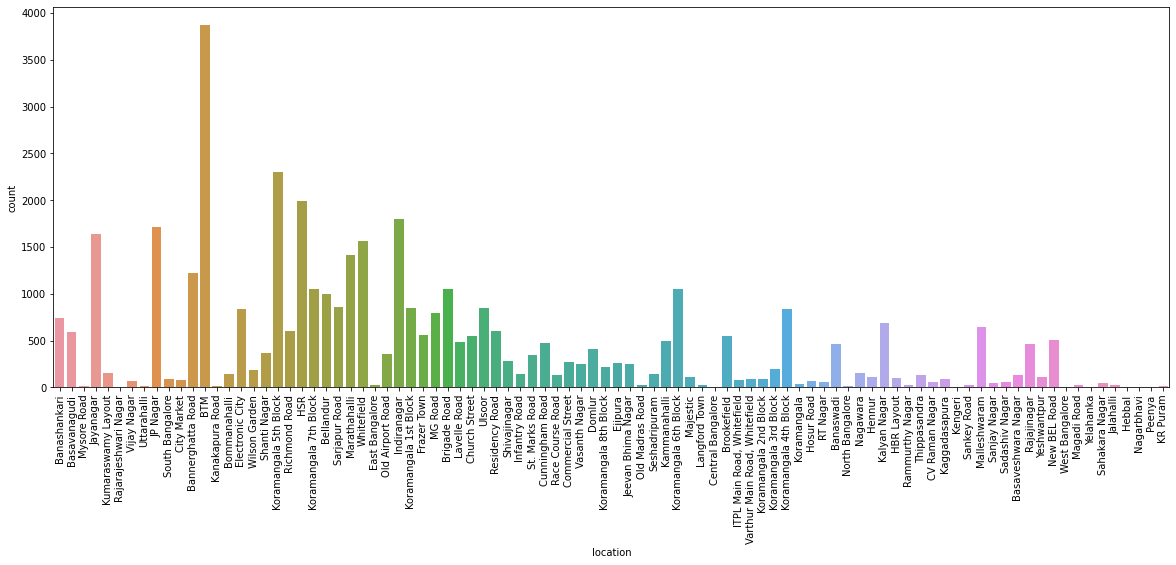

In [13]:
df.location.value_counts()
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
sns.countplot('location', data=df);

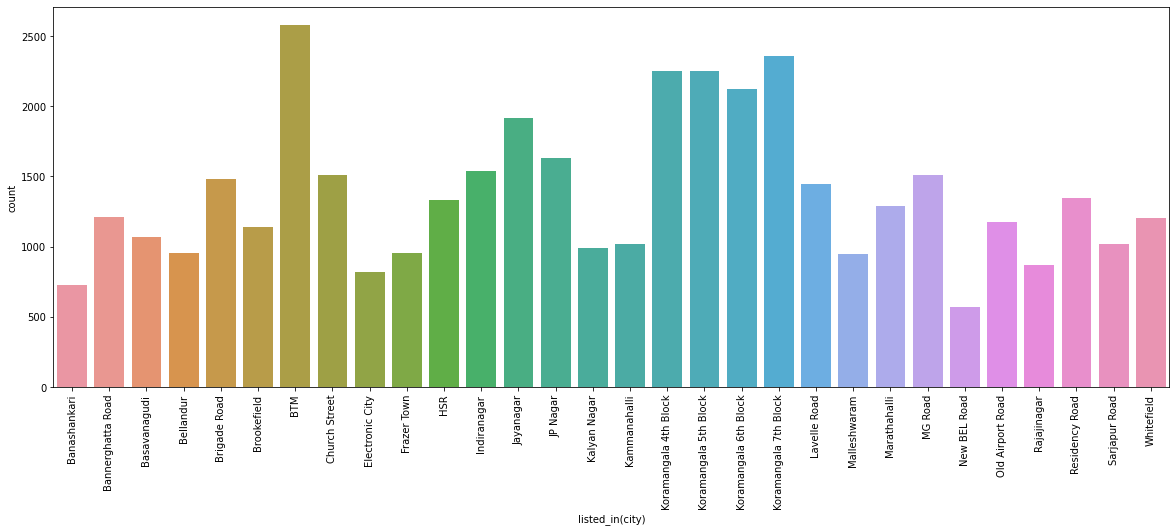

In [14]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
sns.countplot('listed_in(city)', data=df);

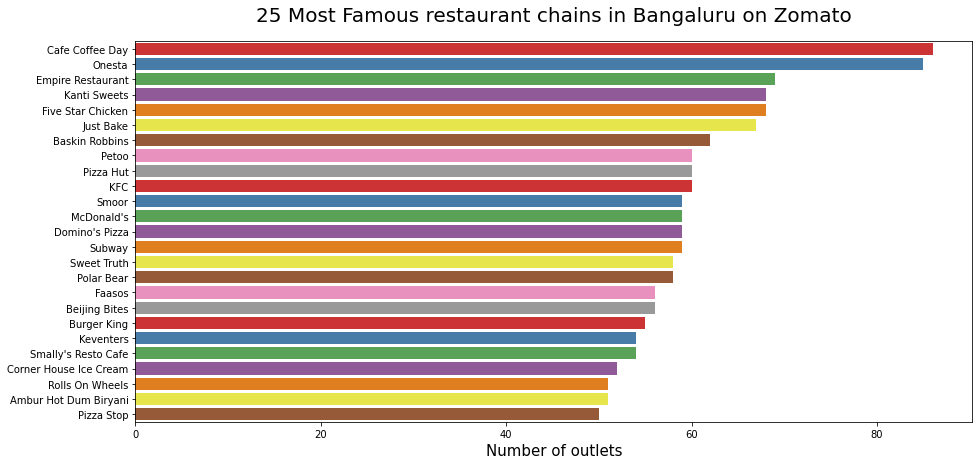

In [15]:
# Famous restaurant chains in Bengaluru
plt.figure(figsize=(15,7))
chains=df['name'].value_counts()[:25]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("25 Most Famous restaurant chains in Bangaluru on Zomato",size=20,pad=20)
plt.xlabel("Number of outlets",size=15);

In [16]:
df['listed_in(city)'].value_counts()

BTM                      2580
Koramangala 7th Block    2361
Koramangala 4th Block    2254
Koramangala 5th Block    2250
Koramangala 6th Block    2121
Jayanagar                1915
JP Nagar                 1633
Indiranagar              1537
Church Street            1512
MG Road                  1510
Brigade Road             1483
Lavelle Road             1449
Residency Road           1345
HSR                      1330
Marathahalli             1293
Bannerghatta Road        1208
Whitefield               1201
Old Airport Road         1173
Brookefield              1139
Basavanagudi             1072
Kammanahalli             1019
Sarjapur Road            1018
Kalyan Nagar              993
Bellandur                 956
Frazer Town               953
Malleshwaram              946
Rajajinagar               872
Electronic City           818
Banashankari              727
New BEL Road              569
Name: listed_in(city), dtype: int64

In [17]:
df['listed_in(type)'].value_counts()

Delivery              20431
Dine-out              14062
Desserts               2709
Cafes                  1511
Drinks & nightlife     1045
Buffet                  847
Pubs and bars           632
Name: listed_in(type), dtype: int64

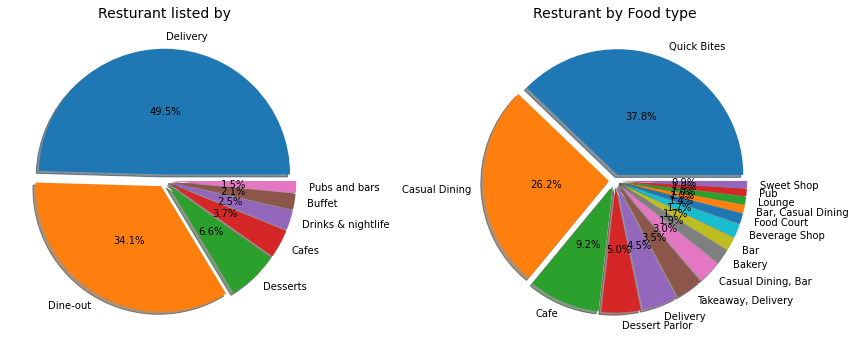

In [18]:
pie, ax = plt.subplots(figsize=[12,8])
plt.subplot(1,2,1)
labels = df['listed_in(type)'].value_counts().keys()
plt.pie(x=df['listed_in(type)'].value_counts(), autopct="%.1f%%", explode=[0.05]*7, labels=labels, pctdistance=0.5,shadow=True)
plt.title("Resturant listed by", fontsize=14);
pie.savefig("Resturant listed by.png")

plt.subplot(1,2,2)
labels = df['rest_type'].value_counts()[:15].keys()
plt.pie(x=df['rest_type'].value_counts()[:15], autopct="%.1f%%", explode=[0.05]*15, labels=labels, pctdistance=0.5,shadow=True)
plt.title("Resturant by Food type", fontsize=14);
pie.savefig("Resturant by Food type.png")

plt.tight_layout()

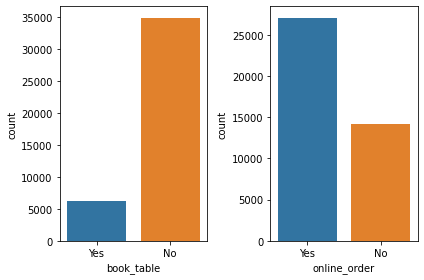

In [19]:
plt.subplot(1,2,1)
sns.countplot('book_table', data=df)

plt.subplot(1,2,2)
sns.countplot('online_order', data=df)


plt.tight_layout()



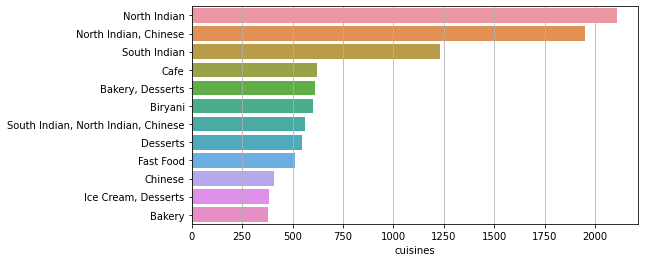

In [20]:
cu = df['cuisines'].value_counts()[:12] # top 12
plt.figure(figsize=(8,4))
plt.grid(True)
sns.barplot(cu,cu.index);

In [21]:
print('Mean cost for eating for 2 person = ', df['approx_cost(for two people)'].mean())

Mean cost for eating for 2 person =  369.5862586997114


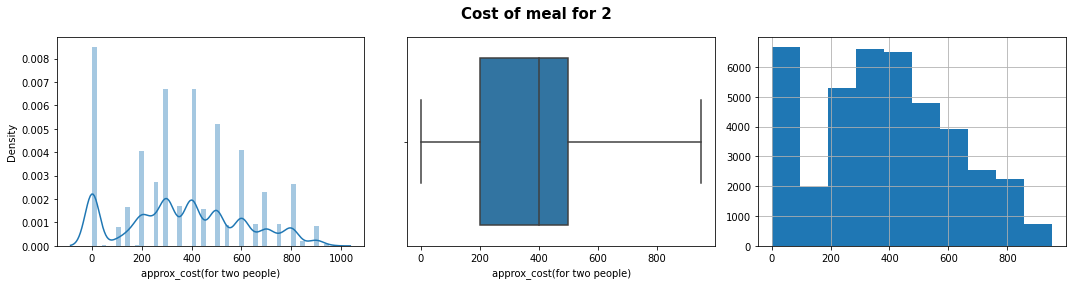

In [22]:
plt.figure(figsize=(15,4))
plt.suptitle("Cost of meal for 2", fontweight='bold', fontsize=15)

plt.subplot(1,3,1)
sns.distplot(df['approx_cost(for two people)'])

plt.subplot(1,3,2)
sns.boxplot(x=df['approx_cost(for two people)'])

plt.subplot(1,3,3)
df['approx_cost(for two people)'].hist()

plt.tight_layout()

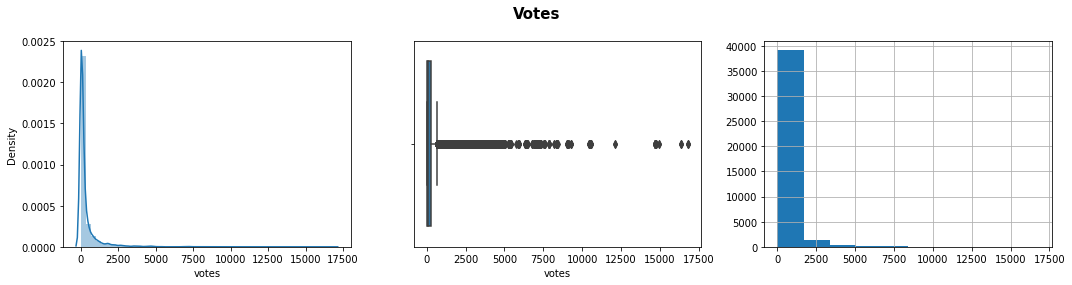

In [23]:
plt.figure(figsize=(15,4))
plt.suptitle("Votes", fontweight='bold', fontsize=15)

plt.subplot(1,3,1)
sns.distplot(df['votes'])

plt.subplot(1,3,2)
sns.boxplot(x=df['votes'])

plt.subplot(1,3,3)
df.votes.hist()

plt.tight_layout()

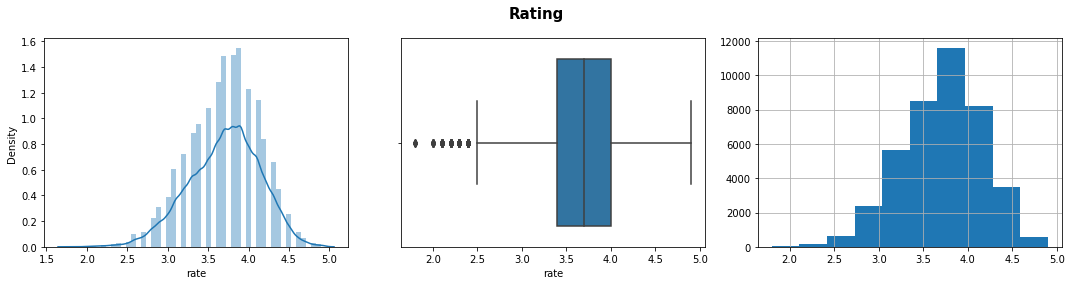

In [24]:
plt.figure(figsize=(15,4))
plt.suptitle("Rating", fontweight='bold', fontsize=15)

plt.subplot(1,3,1)
sns.distplot(df['rate'])

plt.subplot(1,3,2)
sns.boxplot(x=df['rate'])

plt.subplot(1,3,3)
df.rate.hist()

plt.tight_layout()

<a id=3>
    
# Pre-procesing for Machine Learning

In [25]:
#Encode the input Variables
def Encode(df):
    for column in df.columns[~df.columns.isin(['rate', 'approx_cost(for two people)', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

zomato = Encode(df.copy())
zomato.head(2)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0


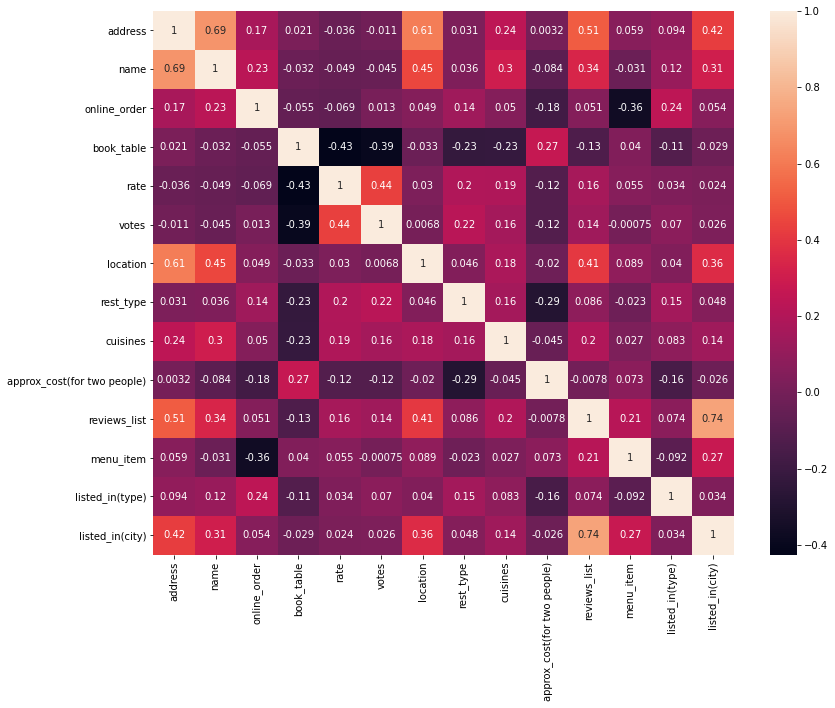

In [26]:
plt.figure(figsize=(13,10))
sns.heatmap(zomato.corr(), annot=True);